# Design of Experiments

###  Observation studies and Experiments

####  Observational study:
- Collect data in a way that does not directly interfere with how the data arise. 
- Only correlation can be inferred.

#### Experiment:
- Randomly assign subjects to various treatments
- Causation can be inferred

Relationships between using screens (mobile, tablet, laptop, etc) at bedtime and attention span.

- **Observational Study:** We sample 2 types of people from the population. Those who choose to use screens at bedtime and those who don't. Then we find the average attention span for the 2 groups of people and compare. Based on the observational study, even if we find a difference between the average attention span of these groups of people, we can't attribute this difference solely to using screens because there may be other variables that we didn't control for this study that could've contributed to the observed difference. For example, people who use screens at night might also be using screens for longer period during the day and their attention span might be affected by the daytime usage as well. 

- **Experiment:** We sample a group of people from the population and then we randomly assign these people into 2 groups: those who are asked to use screens at bedtime and those asked not to use them. The difference is that the decision to use or not use screens at bedtime is NOT left to the subject. Rather, it is imposed by the researcher. At the end, we compare the attention spans of the 2 groups. Such variables that might contribute to the outcome, called confounding variables, are most likely represented equally in the 2 groups due to random assignment. Therefore, if we find the difference between the 2 averages, we can indeed make a causal statement attributing this difference to bedtime screen usage. 


<img src="images/DOE_Study.JPG">

### Random sampling and random assignment

**Random sampling:** Occurs when the subjects are being selected for a study. If the subjects are selected randomly from the population, then the resulting sample is likely representative of the population and therefore the study's results can be generalizable to that population. 

** Random assignment:** Only occurs in experimental settings where subjects are being assigned to various treatments. Random assignments allow for causal conclusions. 

- **Random assignment + random sampling:** Causal and generalizable to the whole population. This is the ideal experiment but such studies are difficult to carry out, especially if the experimental units are humans, since it may be difficult to randomly sample people from the population and then impose treatments on them. 

- **Random assignment + no random sampling:** Causal but not generalizable. Experiments that rely on volunteers employ random assignment but not random sampling. These studies can be used to make causal conclusions but the conclusions but the conclusions can only be applied to the sample and the results cannot be generalized to the population. 

- **No random assignment + random sampling:** Not Causal but generalizable. A study that uses no random assignment but does use random sampling is your typical observational study. Results can only be used to make association statements but they can be generalized to the whole population.   

- **No random assignment + No random sampling:** Neither Causal nor generalizable. These studies can only be used to make non-causal association statements. This is NOT an ideal study. 

### Random sampling or random assignment:

One of the early studies linking smoking and lung cancer compared patients who are already hospitalized with lung cancer to similar patients without lung cancer (hospitalized for other reasons), and recorded whether each patient smoked. Then, proportions of smokers for patients with and without lung cancer were compared. 

**QUESTION:** Does this study employ random sampling and/or random assignment?

**ANSWER:** Neither random sampling nor random assignment. Random assignment is not employed because the conditions are not imposed on the patients by the people conducting the study. Random sampling is not employed because the study records the patients who are already hospitalized, so it wouldn't be appropriate to apply the findings back to the population as a whole. 


### Identify the scope of inference of study

Volunteers were recruited to participate in a study where they were asked to type 40 bits of trivia - for example, "an ostrich's eye is bigger than its brain" - into a computer. A randomly selected half of these subjects were told the information would be saved in the computer. The other half were told the items they typed would be erased. 

Then, the subjects were asked to remember these bits of trivia, and the number of bits of trivia each subject could correctly recall were recorded. It was found that the subjects were significantly more likely to remember information if they thought they would not be able to find it later. 

The results of the study **cannot** be generalized to all people and a causal link between believing information is stored and memory **can** be inferred based on these results. 

There is no random sampling since the subjects of the study were volunteers, so the results cannot be generalized to all people. However, due to random assignment, we are able to infer a causal link between the belief information is stored and the ability to recall that same information. 

### Simpson's Paradox

Often, when one mentions "a relationship between variables", we think of a relationship between just 2 variables (Explanatory variable X and Response variable Y). However, truly understanding the relationship between 2 variables might require considering other potentially related variables as well.  If we don't we might find ourselves in a Simpson's Paradox. 

Labelling variables as explanatory and response does not guarantee the relationship between the two is actually causal, even if there is an association identified. We use these labels only to keep track of which variable we suspect affects the other. 

We could study the relationship between 3 explanatory variables and a single response variable. This is often a more realistic scenario since most real world relationships are multivariable. 

For example, if we're interested in the relationship between calories consumed daily and heart health, we would probably also want to consider information on variables like age and fitness level of the person as well. **Not considering an important variable when studying a relationship can result in what we call a Simpson's Paradox, which illustrate the effect the ommission of an explanatory variable can on the measure of association between another explanatory variable and the response variable. **. 

In other words, the inclusion of a 3rd variable in the analysis can change the apparent relationship between the other 2 variables. 


In [47]:
library(dplyr)

In [48]:
ucb_admit <- read.csv('datasets/UCB_ADMIT.csv')
cols <- c("Admit", "Gender", "Dept")
colnames(ucb_admit) <- cols
head(ucb_admit)

Admit,Gender,Dept
Admitted,Male,A
Admitted,Male,A
Admitted,Male,A
Admitted,Male,A
Admitted,Male,A
Admitted,Male,A


In [49]:
glimpse(ucb_admit)

Observations: 4,526
Variables: 3
$ Admit  <fct> Admitted, Admitted, Admitted, Admitted, Admitted, Admitted, ...
$ Gender <fct> Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, ...
$ Dept   <fct> A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...


### Number of males and females admitted

In [50]:
ucb_admission_counts <- count(ucb_admit, Gender, Admit)
ucb_admission_counts

Gender,Admit,n
Female,Admitted,557
Female,Rejected,1278
Male,Admitted,1198
Male,Rejected,1493


### Proportion of males admitted overall

Next we'll calculate the percentage of males and percentage of females admitted, by creating a new variable, called prop (short for proportion) based off of the counts calculated in the previous exercise and using the mutate() from the dplyr package.

Proportions for each row of the data frame we created in the previous exercise can be calculated as n / sum(n). Note that since the data are grouped by gender, sum(n) will be calculated for males and females separately.

In [51]:
ucb_admission_counts %>%
    group_by(Gender) %>%
    mutate(prop = n / sum(n)) %>%
    filter(Admit == "Admitted")

Gender,Admit,n,prop
Female,Admitted,557,0.3035422
Male,Admitted,1198,0.4451877


It looks like 44% of males were admitted versus only 30% of females. BUT there's more to this story. 

### Proportion of males admitted for each department

Finally we'll make a table similar to the one we constructed earlier, except we'll first group the data by department. The goal is to compare the proportions of male admitted students across departments.

Proportions for each row of the data frame we create can be calculated as n / sum(n). Note that since the data are grouped by department and gender, sum(n) will be calculated for males and females separately for each department.

In [52]:
ucb_admission_counts <- ucb_admit %>%
    group_by(Dept, Gender, Admit) %>%
    count()

ucb_admission_counts

Dept,Gender,Admit,n
A,Female,Admitted,89
A,Female,Rejected,19
A,Male,Admitted,512
A,Male,Rejected,313
B,Female,Admitted,17
B,Female,Rejected,8
B,Male,Admitted,353
B,Male,Rejected,207
C,Female,Admitted,202
C,Female,Rejected,391


In [53]:
ucb_admission_counts  %>%
  group_by(Dept, Gender) %>%
  mutate(prop = n/sum(n))

Dept,Gender,Admit,n,prop
A,Female,Admitted,89,0.82407407
A,Female,Rejected,19,0.17592593
A,Male,Admitted,512,0.62060606
A,Male,Rejected,313,0.37939394
B,Female,Admitted,17,0.68000000
B,Female,Rejected,8,0.32000000
B,Male,Admitted,353,0.63035714
B,Male,Rejected,207,0.36964286
C,Female,Admitted,202,0.34064081
C,Female,Rejected,391,0.65935919


### Gapminder dataset

In [54]:
library(gapminder)

In [55]:
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [56]:
glimpse(gapminder)

Observations: 1,704
Variables: 6
$ country   <fct> Afghanistan, Afghanistan, Afghanistan, Afghanistan, Afgha...
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asi...
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 199...
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 4...
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372,...
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.113...


### Sampling strategies


Why do we sample in the first place? Why not try to collect data from the entire population of interest? You could try to take a census but it isn't easy. First, taking a census requires a lot more resources than collecting data from a sample of the population. Second, certain individuals in your population might be hard to locate or collect data from. If these individuals that are missed in the census are different from those in the rest of the population, the census data will be biased. 

For example, in the US census, illegal immigrants are often not recorded properly since they tend to be reluctant to fill out census forms with the concern that this information could be shared with immigrantion. However, these individuals might have characteristics different from the rest of the population and hence, not getting information from them might result in unreliable data from geographical regions with high concentrations of illegal immigrants. Lastly, populations are constantly changing. Even if you do have the required resources and manage to collect data from everyone in the population, your population will be different tomorrow and so the hard work required to collect such data may not pay off.

### Sample is natural

If you think about it, sampling is actually quite natural. Think about something you are cooking. We taste or in other words examine a small part of what we're cooking to get an idea about the dish as a whole. Afterall, we would never eat a whole pot of soup just to check its taste. When you taste a spoonful of soup and decide the spoonful you tasted isn't salty enough, what you're doing is simply explanatory analysis for the sample at hand. If you then generalize and conclude that your entire soup needs salt, that's making an inference. For your inference to be valid, the spoonful you tasted (your sample), needs to be representative of the entire pot (your population). If your spoonful comes only from the surface and the salt is collected at the bottom, what you tasted is probably not going to be representative of the whole pot. On the other hand, if you first stir the soup thoroughly before you taste, your spoonful will more likely be representative of the whole pot. 

Sampling data is a bit different than sampling soup though. Let's introduce a few commonly used sampling methods: 

* Simple random sampling
* Stratified sampling
* Cluster sampling
* Multistage sampling

### Simple random sampling
We randomly select cases from the population, such that each case is equally likely to be selected. This is similar to randomly drawing names from a hat. 

### Stratified sampling
We first divide the population into homogeneous groups called strata and then we randomly sample from within each stratum. For example, if we wanted to make sure that people from low, medium, and high socioeconomic status are equally represented in a study, we would first divide our population into 3 groups as such and then sample from within each group. 

### Cluster sampling
In cluster sampling, we divide the population into clusters, randomly sample a few clusters, and then sample all observations within these clusters. The clusters, unlike strata in stratified sampling, are heterogeneous within themselves and each cluster is similar to the others, such that we can get away with sampling from just a few of the clusters. 

### Multistage sampling
Multistage sampling adds another steps to cluster sampling. Just like in cluster sampling, we divide the population into clusters, randomly sample a few clusters, and then we randomly sample observations from within those clusters. 

...

Cluster and multistage sampling are often used from economical reasons. One might divide a city into geographic regions that are on average similar to each other and then sample randomly from a few randomly picked regions in order to avoid travelling to all regions. 

### Examples

### Sampling strategies, determine which...

A consulting company is planning a pilot study on marketing in Boston. They identify the zip codes that make up the greater Boston area, then sample 50 randomly selected addresses from each zip code and mail a coupon to these addresses. They then track whether the coupon was used in the following month.

What sampling strategy has this company used?

**Stratified sampling**

### Sampling strategies, choose worst...

A school district has requested a survey be conducted on the socioeconomic status of their students. Their budget only allows them to conduct the survey in some of the schools, hence they need to first sample a few schools.

Students living in this district generally attend a school in their neighborhood. The district is broken into many distinct and unique neighborhoods, some including large single-family homes and others with only low-income housing.

Which approach would likely be the least effective for selecting the schools where the survey will be conducted?

** Cluster sampling, where each cluster is a neighborhood. This sampling strategy would be a bad idea because each neighborhood has a unique socioeconomic status. A good study would collect information about every neighborhood **

### Sampling in R

In [57]:
library(openintro)
library(dplyr)

In [58]:
# load county data
data(county)

In [59]:
head(county)

name,state,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
Autauga County,Alabama,43671,54571,6.068095,10.6,77.5,7.2,24568,53255
Baldwin County,Alabama,140415,182265,6.139862,12.2,76.7,22.6,26469,50147
Barbour County,Alabama,29038,27457,8.752158,25.0,68.0,11.1,15875,33219
Bibb County,Alabama,20826,22915,7.122016,12.6,82.9,6.6,19918,41770
Blount County,Alabama,51024,57322,5.130910,13.4,82.0,3.7,21070,45549
Bullock County,Alabama,11714,10914,9.973062,25.3,76.9,9.9,20289,31602


In [60]:
summary(county)

                name           state         pop2000           pop2010       
 Washington County:  30   Texas   : 254   Min.   :     67   Min.   :     82  
 Jefferson County :  25   Georgia : 159   1st Qu.:  11210   1st Qu.:  11104  
 Franklin County  :  24   Virginia: 134   Median :  24608   Median :  25857  
 Jackson County   :  23   Kentucky: 120   Mean   :  89623   Mean   :  98233  
 Lincoln County   :  23   Missouri: 115   3rd Qu.:  61766   3rd Qu.:  66699  
 Madison County   :  19   Kansas  : 105   Max.   :9519338   Max.   :9818605  
 (Other)          :2999   (Other) :2256   NA's   :3                          
   fed_spend          poverty     homeownership     multiunit    
 Min.   :  0.000   Min.   : 0.0   Min.   : 0.00   Min.   : 0.00  
 1st Qu.:  6.964   1st Qu.:11.0   1st Qu.:69.50   1st Qu.: 6.10  
 Median :  8.669   Median :14.7   Median :74.60   Median : 9.70  
 Mean   :  9.991   Mean   :15.5   Mean   :73.26   Mean   :12.33  
 3rd Qu.: 10.857   3rd Qu.:19.0   3rd Qu.:78.4

In [61]:
glimpse(county)

Observations: 3,143
Variables: 10
$ name          <fct> Autauga County, Baldwin County, Barbour County, Bibb ...
$ state         <fct> Alabama, Alabama, Alabama, Alabama, Alabama, Alabama,...
$ pop2000       <dbl> 43671, 140415, 29038, 20826, 51024, 11714, 21399, 112...
$ pop2010       <dbl> 54571, 182265, 27457, 22915, 57322, 10914, 20947, 118...
$ fed_spend     <dbl> 6.068095, 6.139862, 8.752158, 7.122016, 5.130910, 9.9...
$ poverty       <dbl> 10.6, 12.2, 25.0, 12.6, 13.4, 25.3, 25.0, 19.5, 20.3,...
$ homeownership <dbl> 77.5, 76.7, 68.0, 82.9, 82.0, 76.9, 69.0, 70.7, 71.4,...
$ multiunit     <dbl> 7.2, 22.6, 11.1, 6.6, 3.7, 9.9, 13.7, 14.3, 8.7, 4.3,...
$ income        <dbl> 24568, 26469, 15875, 19918, 21070, 20289, 16916, 2057...
$ med_income    <dbl> 53255, 50147, 33219, 41770, 45549, 31602, 30659, 3840...


In [62]:
# since DC is not a state by definition, we're going to remove it

county_noDC <- county %>%
    filter(state != "District of Columbia") %>%
    droplevels()

# we'll drop levels for good measure
# dso the District of Columbia is removed completely
# from our dataframe. 

head(county_noDC)

name,state,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
Autauga County,Alabama,43671,54571,6.068095,10.6,77.5,7.2,24568,53255
Baldwin County,Alabama,140415,182265,6.139862,12.2,76.7,22.6,26469,50147
Barbour County,Alabama,29038,27457,8.752158,25.0,68.0,11.1,15875,33219
Bibb County,Alabama,20826,22915,7.122016,12.6,82.9,6.6,19918,41770
Blount County,Alabama,51024,57322,5.130910,13.4,82.0,3.7,21070,45549
Bullock County,Alabama,11714,10914,9.973062,25.3,76.9,9.9,20289,31602


Suppose our limited resources require that we collect data from only 150 of the over 3000 counties in the United States. One option is to take a simple random sample.

In [63]:
# simple random sample of 150 counties

county_srs <- county_noDC %>%
    sample_n(size = 150)

glimpse(county_srs)

Observations: 150
Variables: 10
$ name          <fct> Salt Lake County, Mc Kean County, Rice County, Randol...
$ state         <fct> Utah, Pennsylvania, Kansas, Illinois, Tennessee, Geor...
$ pop2000       <dbl> 898387, 45936, 10761, 33893, 6786, 96065, 15822, 1748...
$ pop2010       <dbl> 1029655, 43450, 10083, 33476, 6819, 94565, 14159, 185...
$ fed_spend     <dbl> 8.261465, 9.350104, 8.305068, 7.006482, 13.879894, 11...
$ poverty       <dbl> 10.3, 13.9, 13.7, 10.4, 30.3, 28.9, 11.8, 15.8, 12.3,...
$ homeownership <dbl> 68.5, 74.4, 75.5, 78.7, 71.5, 48.5, 80.6, 76.2, 76.9,...
$ multiunit     <dbl> 27.1, 10.9, 6.0, 9.7, 7.4, 31.5, 6.6, 2.9, 7.9, 20.3,...
$ income        <dbl> 25041, 21022, 19316, 19950, 13717, 19210, 23125, 2120...
$ med_income    <dbl> 58004, 40097, 43164, 45020, 23125, 32435, 41026, 4542...


However, if we wanted to obtain equal number of counties from each state that is 3 counties per state, a simple random sample won't ensure that. We can confirm this by counting the number of counties per state...

In [64]:
county_srs %>% 
    group_by(state) %>%
    count()

state,n
Alabama,4
Alaska,1
Arizona,3
Arkansas,3
California,1
Colorado,2
Florida,2
Georgia,6
Idaho,1
Illinois,4


If we instead want to sample 3 counties per state to make up our sample of 150 counties, we should use stratified sampling.

In [65]:
# stratified sample of 150 counties
# each state is a stratum

county_str <- county_noDC %>%
    group_by(state) %>%
    sample_n(size = 3)

glimpse(county_str)

Observations: 150
Variables: 10
$ name          <fct> Marengo County, Dale County, Perry County, Prince of ...
$ state         <fct> Alabama, Alabama, Alabama, Alaska, Alaska, Alaska, Ar...
$ pop2000       <dbl> 22539, 49129, 11861, 6146, 7028, 2392, 69423, 97470, ...
$ pop2010       <dbl> 21027, 50251, 10591, 5559, 7459, 2508, 71518, 107449,...
$ fed_spend     <dbl> 10.101346, 25.774791, 12.354735, 10.248966, 14.112616...
$ poverty       <dbl> 22.7, 14.8, 28.8, 14.0, 31.4, 7.2, 34.4, 24.4, 15.7, ...
$ homeownership <dbl> 73.5, 61.2, 67.8, 69.0, 64.8, 74.5, 76.3, 72.5, 69.0,...
$ multiunit     <dbl> 8.3, 13.2, 11.4, 9.7, 4.1, 13.2, 5.2, 7.0, 12.2, 16.7...
$ income        <dbl> 18323, 21722, 13433, 24193, 11269, 27979, 12294, 1674...
$ med_income    <dbl> 32940, 43353, 25950, 45728, 37955, 47981, 30184, 3977...


In [66]:
county_str %>% 
    group_by(state) %>%
    count()

state,n
Alabama,3
Alaska,3
Arizona,3
Arkansas,3
California,3
Colorado,3
Connecticut,3
Delaware,3
Florida,3
Georgia,3


Simple random sampling would result in diferent amounts of data being sampled from each state. Stratified sampling ensured an equal number of states from each region. 

### Principles of experimental design

* Control: To control means to compare the treatment of interest to a control group. 

* Randomize: To randomize means to randomly assingly subjects to treatments. 

* Replicate: To replicate means to collect a sufficiently large sample within a study or to replicate the entire study. 

* Block: The goal of blocking is to account for potential effect of known or suspected confounding variables. We do this by first grouping subjects into blocks based on these variables and then randomizing them within each block to treatment groups. 


...

Let's discuss block a bit more

### Design a study (with blocking)

We would like to design an experiment to investigate whether students learn the R language in a traditional lecture based course or using an interactive online learning platform. 

Two courses that teach the exact same material are designed and the only difference between these courses is the method of delivery: traditional lecture or interactive online. 

We sample a group of students for our study that we will randomly assign to these 2 courses. But before we do so, we need to consider any potential confounding variables. It is suspected that previous programming experience might have an effect on how students learn in these two settings and we know that some of the students in our study have previous programming experience and some don't. Therefore, we decide to block for having previous programming experience. 

To do so, we divide our sample into two: those with programming experience and those without. Then we randomly assign individuals from each block into the 2 courses, ensuring that those with and without programming experience are equally represented in the 2 treatment groups. In this experiment, the explanatory variable is the course type lecture vs interactive online and the variable that we're blocking for is the previous programming experience. 

This way, if we find a difference in mastery of the R language between students in the 2 groups, we will be able to attribute it to the course-type and can be assured that the difference isn't due to previous programming experience since both those with and without such experience were equally represented in the 2 treatment groups. 

<img src="images/DOE_Blocking.JPG">

### Identifying components of a study

A researcher designs a study to test the effect of light and noise levels on exam performance of students. The researcher also believes that light and noise levels might have different effects on males and females, so she wants to make sure both genders are represented equally under different conditions.

**Answer:** There are 2 explanatory variables (light and noise), 1 blocking variable (gender), and 1 repsonse varaible (exam performance). 

### Experimental design terminology

**Explanatory variables** are conditions you can impose on the experimental units, while **blocking variables** are characteristics that the experimental units come with that you would like to control for.

### Connect blocking and stratifying

In random sampling, we use stratifying to control for a variable. In random assignment, we use blocking to achieve the same goal.

# Case study: Beauty in the classroom

Many college courses conclude by giving students the opportunity to annoymously evalaute both the course and the instructor. However, the use of these student evaluations as an indicator of course quality and teaching effectiveness is often criticized because the measures may reflect the influence of non-teaching related characteristics, such as the physical appearance of the instructor.

The data that we will be working with, which includes information on course evaluations as well as students' scoring of professors' physical attractiveness, was collected as part of a study conducted at the University of Texas - Austin. Let's analyze these data with the eventual goal of investigating whether instructors who are viewed to be better looking receive higher instructional ratings. 

In [67]:
load('datasets/evals.RData')

In [68]:
head(evals)

score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,...,multi credit,4,4,2,2,3,3,3,not formal,color
4.3,tenured,not minority,male,english,59,87.50000,35,40,upper,...,multi credit,4,4,2,2,3,3,3,not formal,color


In [69]:
summary(evals)

     score                 rank            ethnicity      gender   
 Min.   :2.300   teaching    :102   minority    : 64   female:195  
 1st Qu.:3.800   tenure track:108   not minority:399   male  :268  
 Median :4.300   tenured     :253                                  
 Mean   :4.175                                                     
 3rd Qu.:4.600                                                     
 Max.   :5.000                                                     
        language        age        cls_perc_eval     cls_did_eval   
 english    :435   Min.   :29.00   Min.   : 10.42   Min.   :  5.00  
 non-english: 28   1st Qu.:42.00   1st Qu.: 62.70   1st Qu.: 15.00  
                   Median :48.00   Median : 76.92   Median : 23.00  
                   Mean   :48.37   Mean   : 74.43   Mean   : 36.62  
                   3rd Qu.:57.00   3rd Qu.: 87.25   3rd Qu.: 40.00  
                   Max.   :73.00   Max.   :100.00   Max.   :380.00  
  cls_students    cls_level      cls_prof

In [70]:
glimpse(evals)

Observations: 463
Variables: 21
$ score         <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8...
$ rank          <fct> tenure track, tenure track, tenure track, tenure trac...
$ ethnicity     <fct> minority, minority, minority, minority, not minority,...
$ gender        <fct> female, female, female, female, male, male, male, mal...
$ language      <fct> english, english, english, english, english, english,...
$ age           <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 4...
$ cls_perc_eval <dbl> 55.81395, 68.80000, 60.80000, 62.60163, 85.00000, 87....
$ cls_did_eval  <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, ...
$ cls_students  <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 2...
$ cls_level     <fct> upper, upper, upper, upper, upper, upper, upper, uppe...
$ cls_profs     <fct> single, single, single, single, multiple, multiple, m...
$ cls_credits   <fct> multi credit, multi credit, multi credit, multi credi...
$ bty_f1lower   <int

#### This is an observational study

### Sampling / experimental attributes

The data from this study were gathered by randomly sampling classes.

### Variables in the data

* score: The average evaluation score of the professor for a given course. Scores range between 1 and 5 and 5 being an excellent evaluation. 

* rank: We are also given whether the professor is a teaching faculty, tenure track faculty, or tenured faculty.

* minority: Whether they are from a minority group or not

* gender: Whether they are male or female

* language: Whether the language of instruction at the university where they received their education was English or not. 

* Age: The age of the professor

We also have attribute about the classes themselves. 

* cls_perc_eval: Percent of students who completed the evaluations
* cls_did_eval: Number of students who completed the evals
* cls_students: Total number of students in the class
* cls_level: Level of the course
* cls_profs: Whether a single professor or multiple professors taught it
* cls_credits: Whether the course was a single credit or multi-credit course.

The attractiveness score of the professors in the sample were determined by six students who provided photos of the professors to rate. These students were comprised of 1 female who is lower level, that is first year or sophomore (indicated with f1lower), 2 female students who are upper level (indicated with f1upper and f2upper), one male student who is lower lowerl (m1lower) and 2 male students who are upper level (m1upper and m2upper). 1 indicates a low attractiveness score and a 10 indicates a high attractiveness score. 

* bty_avg: Average attractiveness score
* pic_outfit: Whether the professor was wearing a formal outfit in the photo
* pic_color: Whether the picture was black/white or in color. 

### Identify variable types

It's always useful to start your exploration of a dataset by identifying variable types. The results from this exercise will help you design appropriate visualizations and calculate useful summary statistics later in your analysis.

In [71]:
glimpse(evals)

Observations: 463
Variables: 21
$ score         <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8...
$ rank          <fct> tenure track, tenure track, tenure track, tenure trac...
$ ethnicity     <fct> minority, minority, minority, minority, not minority,...
$ gender        <fct> female, female, female, female, male, male, male, mal...
$ language      <fct> english, english, english, english, english, english,...
$ age           <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 4...
$ cls_perc_eval <dbl> 55.81395, 68.80000, 60.80000, 62.60163, 85.00000, 87....
$ cls_did_eval  <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, ...
$ cls_students  <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 2...
$ cls_level     <fct> upper, upper, upper, upper, upper, upper, upper, uppe...
$ cls_profs     <fct> single, single, single, single, multiple, multiple, m...
$ cls_credits   <fct> multi credit, multi credit, multi credit, multi credi...
$ bty_f1lower   <int

**Categorical variables:** "rank", "ethnicity", "gender", "language",           "cls_level", "cls_profs", "cls_credits", "pic_outfit", "pic_color"

### Recode a variable
The cls_students variable in evals tells you the number of students in the class. Suppose instead of the exact number of students, you're interested in whether the class is

* "small" (18 students or fewer),
* "midsize" (19 - 59 students), or
* "large" (60 students or more).

Recode the cls_students variable into a new variable, cls_type, using case_when(). This new variable should have three levels as described above. Save the resulting data frame (with the new variable) as evals.

In [75]:
# Recode cls_students as cls_type
evals <- evals %>%
  mutate(cls_type = case_when(
    cls_students <= 18 ~ "small",
    cls_students >= 19 & cls_students <= 59  ~ "midsize",
    cls_students >= 60 ~ "large"
    )
  )

In [76]:
glimpse(evals)

Observations: 463
Variables: 22
$ score         <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8...
$ rank          <fct> tenure track, tenure track, tenure track, tenure trac...
$ ethnicity     <fct> minority, minority, minority, minority, not minority,...
$ gender        <fct> female, female, female, female, male, male, male, mal...
$ language      <fct> english, english, english, english, english, english,...
$ age           <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 4...
$ cls_perc_eval <dbl> 55.81395, 68.80000, 60.80000, 62.60163, 85.00000, 87....
$ cls_did_eval  <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, ...
$ cls_students  <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 2...
$ cls_level     <fct> upper, upper, upper, upper, upper, upper, upper, uppe...
$ cls_profs     <fct> single, single, single, single, multiple, multiple, m...
$ cls_credits   <fct> multi credit, multi credit, multi credit, multi credi...
$ bty_f1lower   <int

In [77]:
head(evals)

score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color,cls_type
4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,5,7,6,2,4,6,5,not formal,color,midsize
4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,...,5,7,6,2,4,6,5,not formal,color,large
3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,...,5,7,6,2,4,6,5,not formal,color,large
4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,...,5,7,6,2,4,6,5,not formal,color,large
4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,...,4,4,2,2,3,3,3,not formal,color,midsize
4.3,tenured,not minority,male,english,59,87.50000,35,40,upper,...,4,4,2,2,3,3,3,not formal,color,midsize


### Create a scatterplot
The bty_avg variable shows the average beauty rating of the professor by the six students who were asked to rate the attractiveness of these faculty. The score variable shows the average professor evaluation score, with 1 being very unsatisfactory and 5 being excellent.

In [80]:
library(ggplot2)

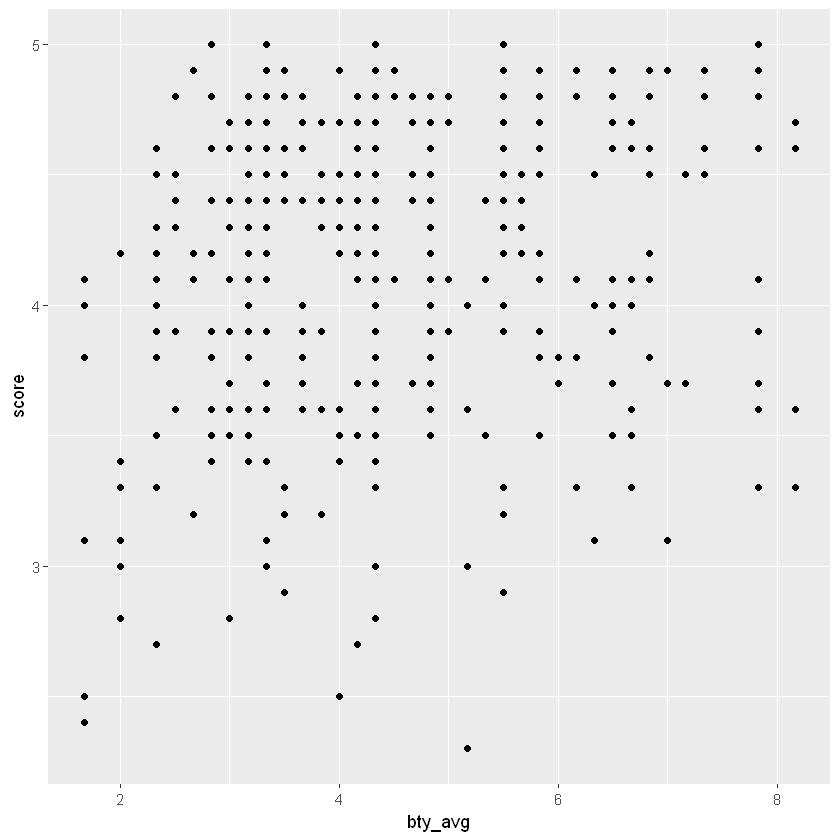

In [83]:
ggplot(evals, aes(x = bty_avg, y = score)) + geom_point()

### Create a scatterplot, with an added layer
Suppose you are interested in evaluating how the relationship between a professor's attractiveness and their evaluation score varies across different class types (small, midsize, and large).

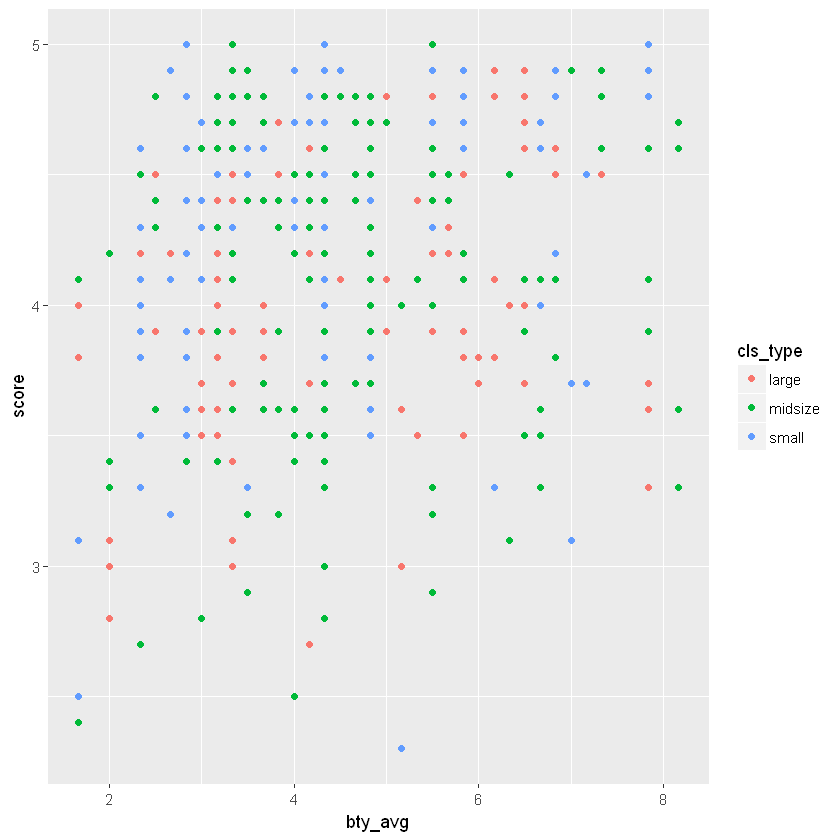

In [86]:
ggplot(evals, aes(x = bty_avg, y = score, color = cls_type)) +
    geom_point()